Diamond data set :

price : dolar $

carat : weight

cut : quality(Fair, very good, premium , ideal)

color : (from j (worst) to D (best))

clarity :  cleaning clarity 
(I1 (worst) , SI2 ,SI1 ,VS1,VVS2,VVS1,IF(best))

x : length in mm (0-10.74)

y : width in mm(0-58.9)

z : depth in mm(0-31.8)

depth : total depth percentage = z / mean(x,y) = 2 * z/ 43-79)

table : width of top of diamond relative to widest point (45-95)



In [1]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.shape

(53940, 10)

In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
from pandas.api.types import CategoricalDtype

# We need to cahange the object to categorial however , They will be nominal and which is not our need. We need to make them ordinal due to ordinal variables.

In [6]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
df.color = df.color.astype(CategoricalDtype(ordered = True))
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [7]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [8]:
df.cut.head(1)
#cut : quality(Fair, very good, premium , ideal)
df.color.head(1)
#color : (from j (worst) to D (best))
df.clarity.head(1)
#clarity : cleaning clarity (I1 (worst) 
            #SI2 ,SI1 ,VS1,VVS2,VVS1,IF(best))

0    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < IF < SI1 < SI2 < VS1 < VS2 < VVS1 < VVS2]

In [32]:
cut_categories = ['Fair','Good','Very Good','Premium','Ideal']


In [33]:
color_categories = ['J','I','H','G','F','E','D']


In [46]:
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [35]:
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_categories ,ordered = True))


In [36]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories ,ordered = True))


In [51]:
df.color = df.color.astype(CategoricalDtype(categories = color_categories ,ordered = True))


In [63]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): [I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF]

In [11]:
## Barplot is used to visualize of categorical variables
#histogram can not used for categorical variables
# continuous variables can not used categorical.

# Barplot

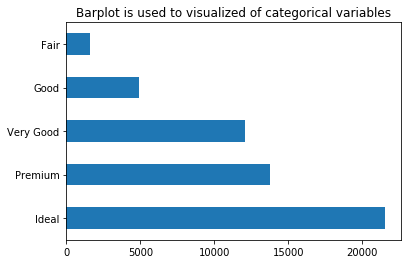

In [38]:
(df['cut']
 .value_counts()
 .plot.barh()
 .set_title('Barplot is used to visualized of categorical variables'));

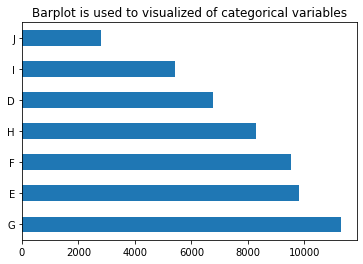

In [39]:
(df['color']
 .value_counts()
 .plot.barh()
 .set_title('Barplot is used to visualized of categorical variables'));

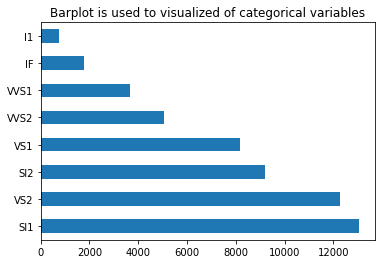

In [31]:
(df['clarity']
 .value_counts()
 .plot.barh()
 .set_title('Barplot is used to visualized of categorical variables'));

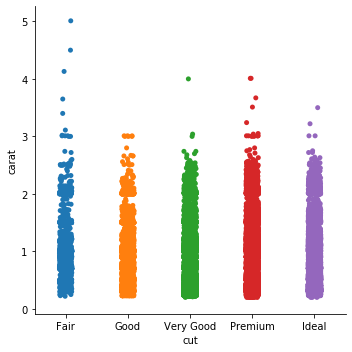

In [64]:
sns.catplot(x = 'cut' , y = 'carat', data = df)

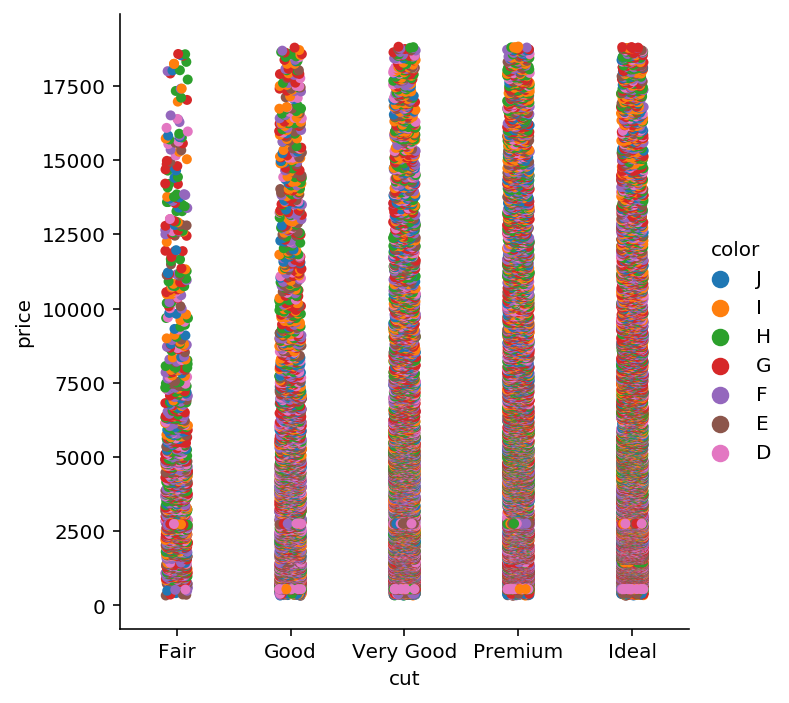

In [68]:
%config InlineBackend.figure_format = 'retina'
sns.catplot(x = 'cut' , y = 'price', hue = 'color', data = df);

# Histogram and density

In [69]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


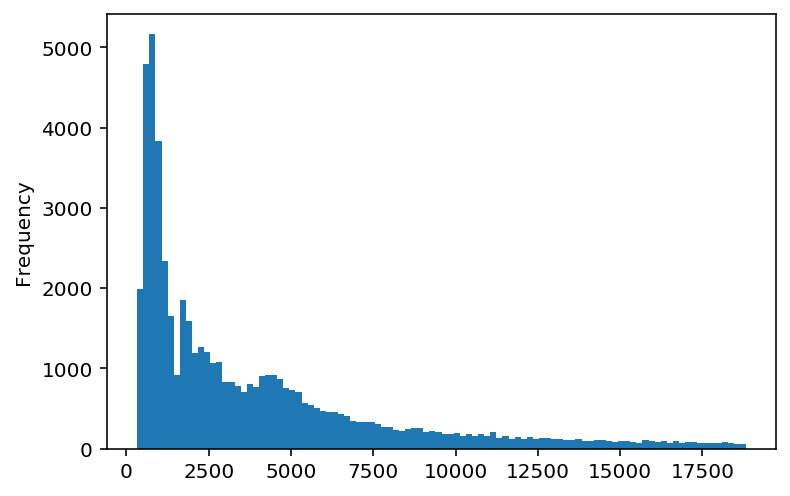

In [70]:
(df['price']
.plot
.hist(bins = 100));

# between 0-1250 8000 obervation 



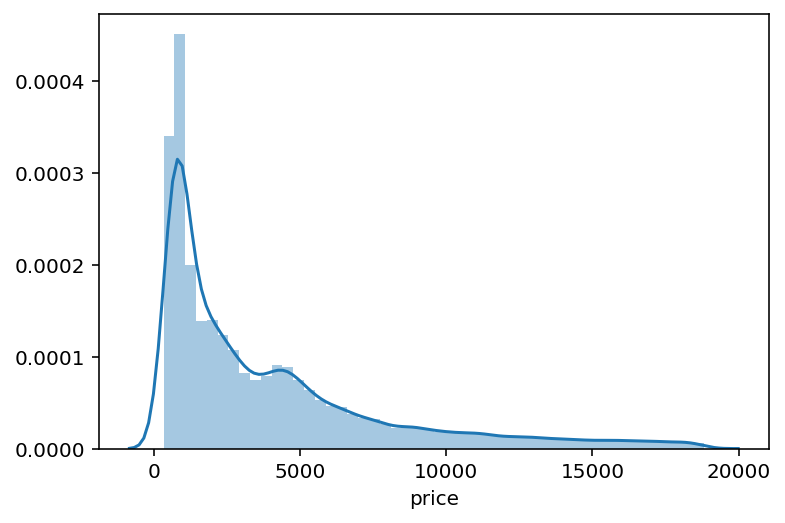

In [72]:
sns.distplot(df.price);

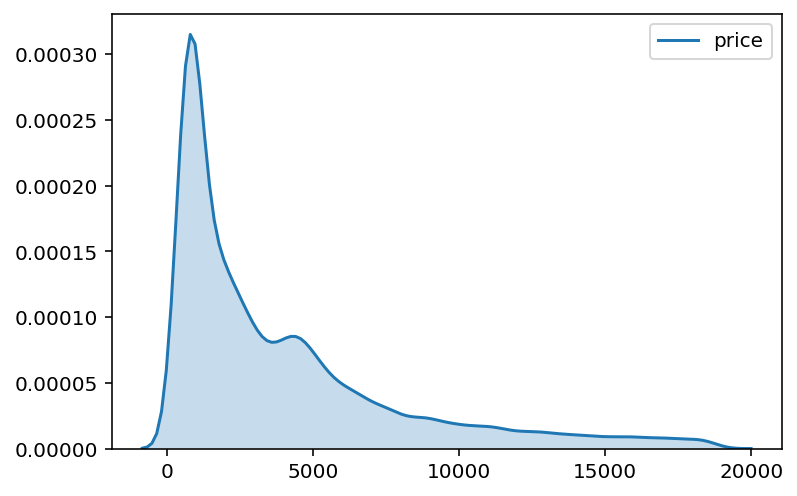

In [74]:
sns.kdeplot(df.price, shade = True);

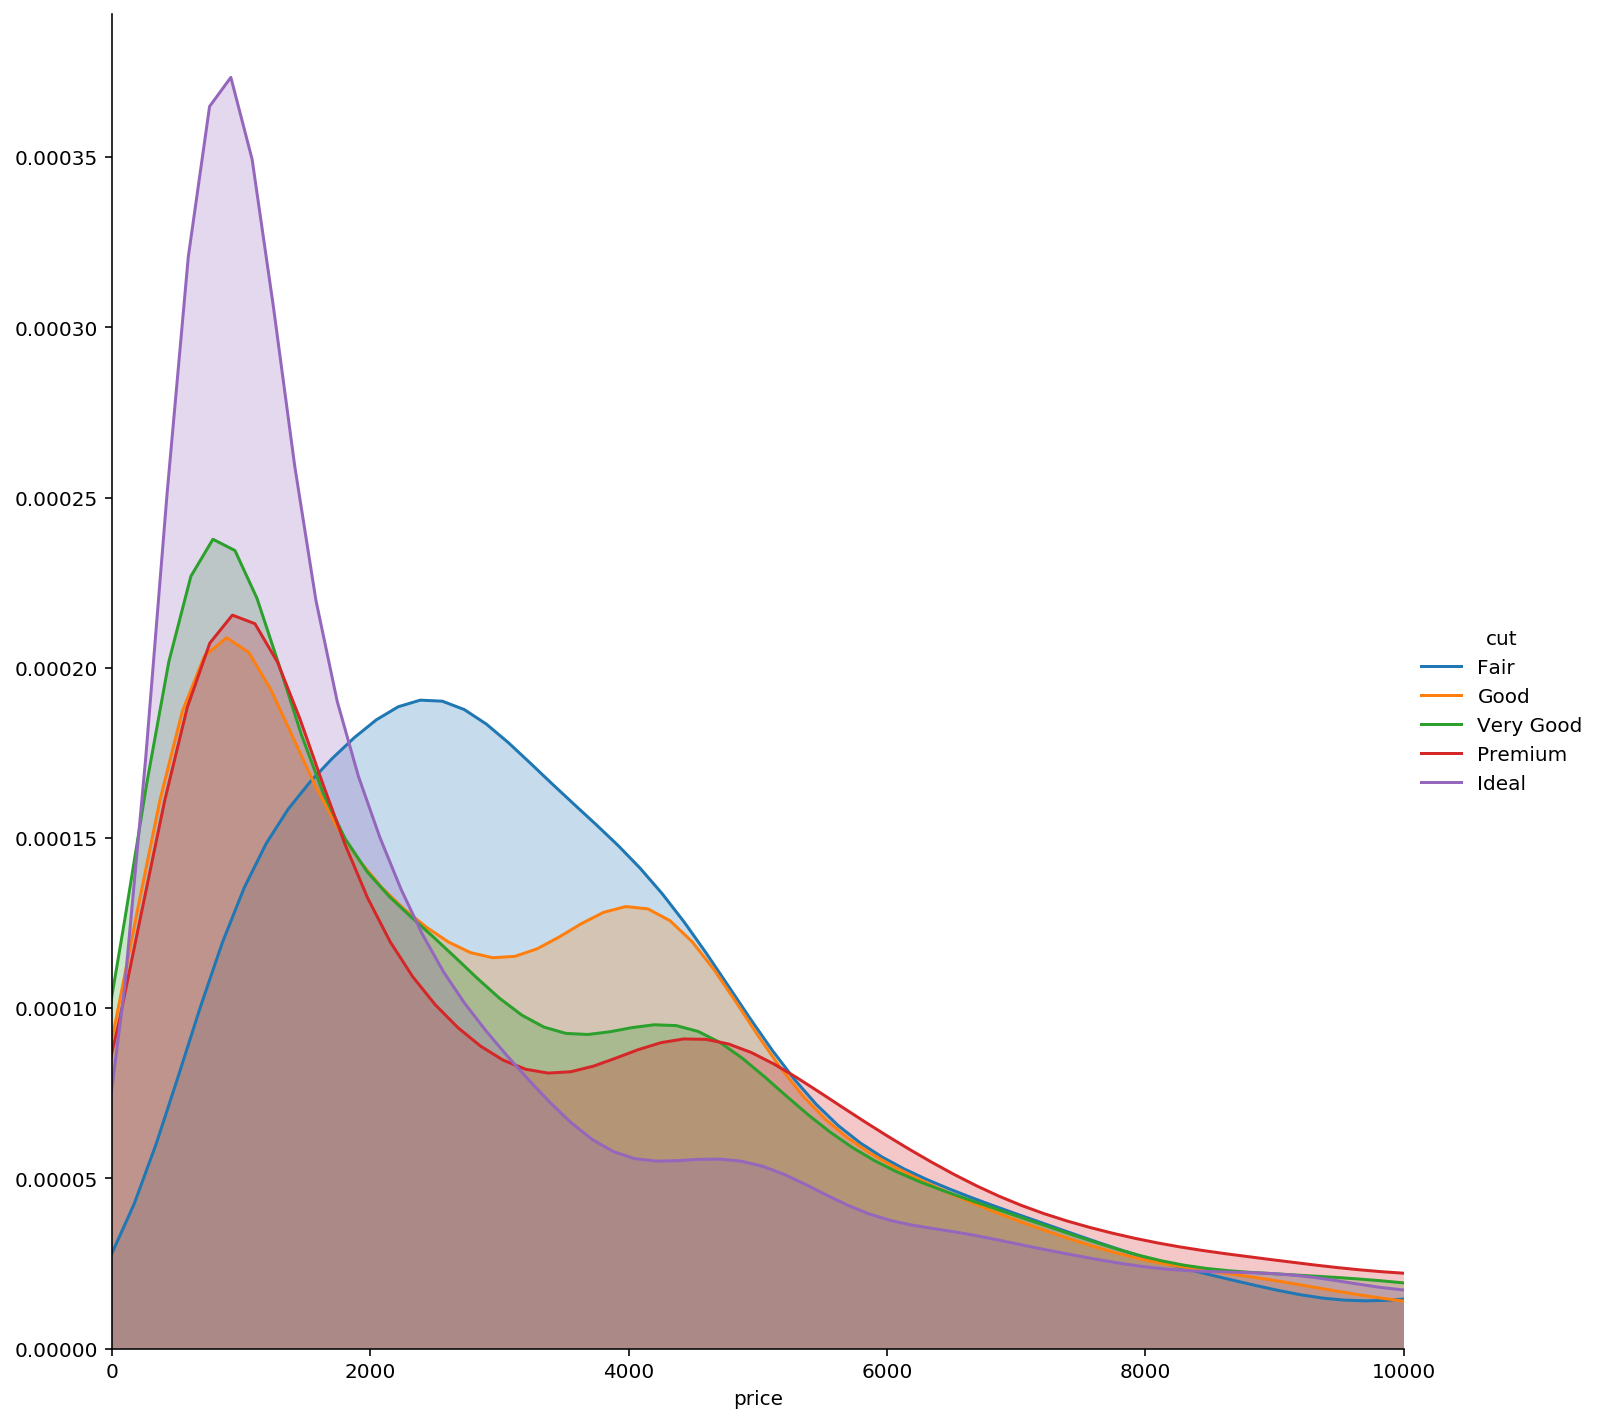

In [77]:
# grafigi bolmek icin kullanilir
%config InlineBackend.figure_format = 'retina'
(sns
   .FacetGrid(df,                    #we cross price and cut
             hue = 'cut',           # face grid seperate the graphs
             height = 10,           #
             xlim = (0,10000))      #
   .map(sns.kdeplot, 'price', shade = 'True')#
   .add_legend()
   );  
                                        

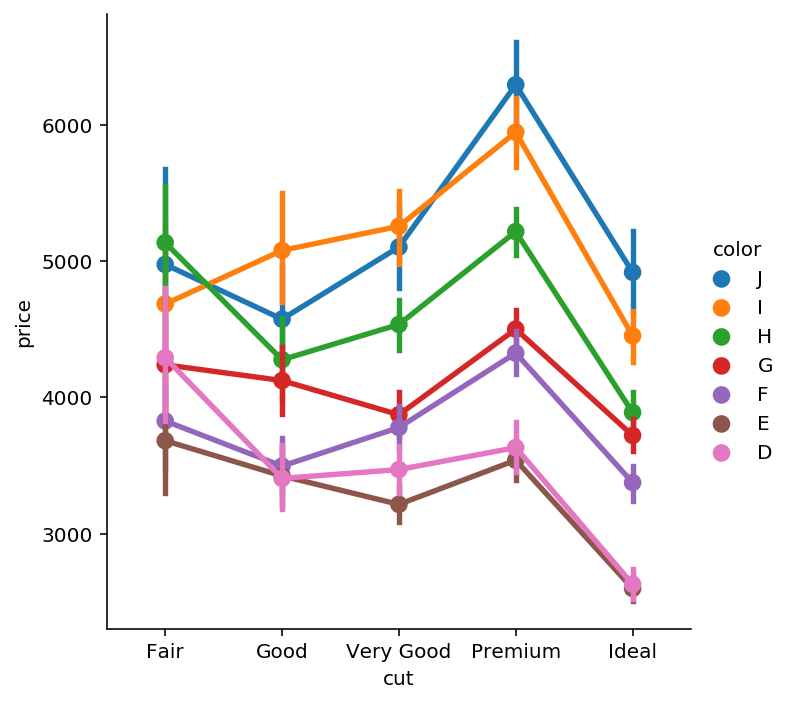

In [78]:
sns.catplot(x = 'cut', y = 'price', hue = 'color', kind = 'point',data = df)